## Some context

 - dataset contains transactions from September 2013 in Europe
 - highly unbalanced
 - features V_1, V_2, ..., V_28 obtained from PCA
 - feature 'Time' = delta of time elapsed from the first transaction

# Project Setup

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # using a 3 decimal format
df = pd.read_csv("../creditcard.csv")  # read the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


# Data exploration

We can observe that V_1 through V_28 have been scaled

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [4]:
df.isnull().sum().max()

0

In [5]:
df['Class'].value_counts()[1]/len(df)*100

0.1727485630620034

We can already observe some things:

- most transactions are quite small, the mean of 'Amount' is only 88 USD
- no nulls in the dataset
- fraudulent transactions are only about 0.17%

Text(0.5, 1.0, '0: No Fraud || 1: Fraud')

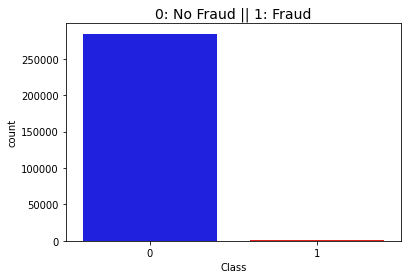

In [6]:
sns.countplot('Class', data=df, palette=['blue', 'red'])
plt.title('0: No Fraud || 1: Fraud', fontsize=14)

(0.0, 172792.0)

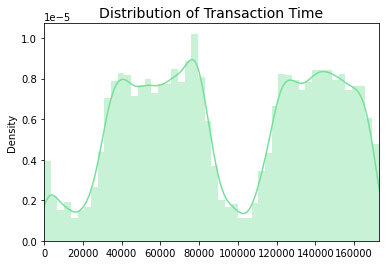

In [7]:
time_val = df['Time'].values
ax = sns.distplot(time_val, color='#77e09a')
ax.set_title('Distribution of Transaction Time', fontsize=14)
ax.set_xlim([min(time_val), max(time_val)])

(0.0, 25691.16)

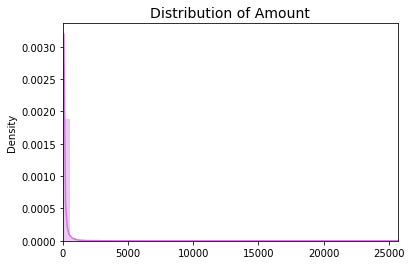

In [8]:
amount_vals = df['Amount'].values
ax = sns.distplot(amount_vals, color='#d277e0')
ax.set_title('Distribution of Amount', fontsize=14)
ax.set_xlim([min(amount_vals), max(amount_vals)])

# Under-sampling
We want to obtain 50/50 distribution because our original dataset will be prone to overfitting

In [9]:
from sklearn.preprocessing import RobustScaler

# we can observe above there are many outliers to the Amount feature

scaler = RobustScaler()
scaled_time = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
scaled_amount = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.insert(0, "scaled_time", scaled_time)
df.insert(1, "scaled_amount", scaled_amount)
df.drop(["Time", "Amount"], axis=1, inplace=True)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.995,1.783,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,...,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,-0.995,-0.270,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,...,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,-0.995,4.984,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,...,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,-0.995,1.418,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,...,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,-0.995,0.671,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,...,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

# because we want to keep the ratio of frauds (0.17%) we are using a special splitting module
sss = StratifiedShuffleSplit(n_splits=5)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values


# check if ratio was kept
train_unique_label, train_count_label = np.unique(y_train, return_counts=True)
test_unique_label, test_count_label = np.unique(y_test, return_counts=True)

print("Train distribution: ", train_count_label/len(y_train))
print("Test distribution: ", test_count_label/len(y_test))

Train distribution:  [0.99827173 0.00172827]
Test distribution:  [0.99827955 0.00172045]


In [11]:
# we shuffle in order to ensure randomness, Time feature might be sensitive to ordering
df = df.sample(frac=1)

df_fraud = df.loc[df["Class"] == 1]
df_no_fraud = df.loc[df["Class"] == 0][:492]

concat_df = pd.concat([df_fraud, df_no_fraud])

new_df = concat_df.sample(frac=1, random_state=1337)  # reshuffle
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
248296,0.813,-0.307,-0.614,3.699,-5.535,5.620,1.649,-2.335,-0.907,0.706,...,0.355,0.319,-0.471,-0.076,-0.668,-0.643,0.071,0.488,0.292,1
278825,0.984,0.042,-0.498,0.741,0.465,0.939,-0.254,0.576,-0.409,0.679,...,-0.256,0.562,1.558,0.088,0.702,-1.350,-0.592,-0.025,0.251,0
30384,-0.573,-0.293,-2.857,4.046,-4.197,5.487,-3.071,-1.423,-5.651,2.020,...,0.982,1.080,-0.561,0.103,-0.067,-0.477,-0.104,1.167,0.664,1
239499,0.769,0.391,-2.151,2.188,-3.431,0.119,-0.173,0.291,-2.809,-2.679,...,0.532,-0.073,0.561,-0.075,-0.438,0.354,-0.521,0.144,0.027,1
12261,-0.743,-0.293,-17.468,10.115,-24.202,11.805,-10.198,-2.580,-17.657,2.257,...,1.002,-2.328,0.941,1.297,-1.055,0.112,0.680,2.094,-1.425,1


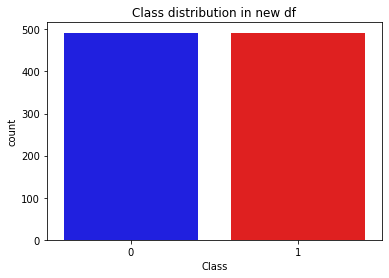

In [12]:
sns.countplot("Class", data=new_df, palette=["blue", "red"])
plt.title("Class distribution in new df")
plt.show()

Next, we are going to look at correlation matrices to analyze which features

<AxesSubplot:>

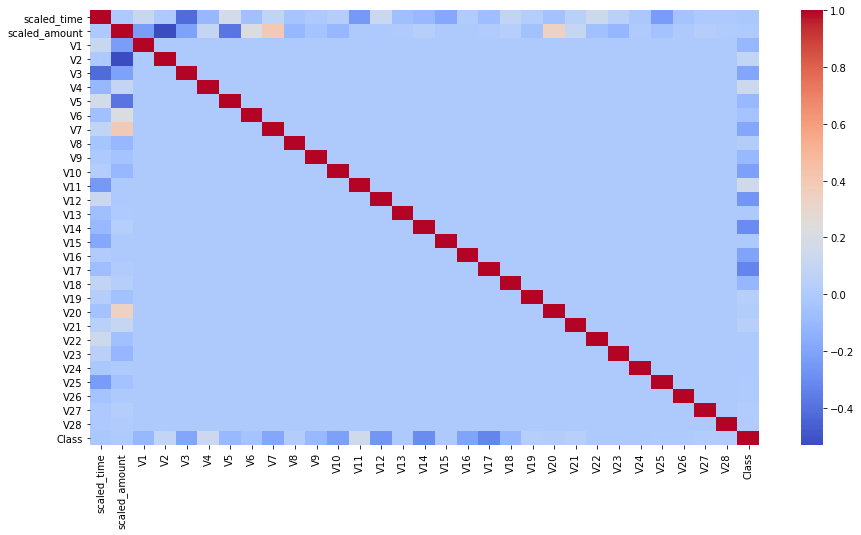

In [13]:
# corr mat for initial df

corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':20}, ax=ax)

<AxesSubplot:>

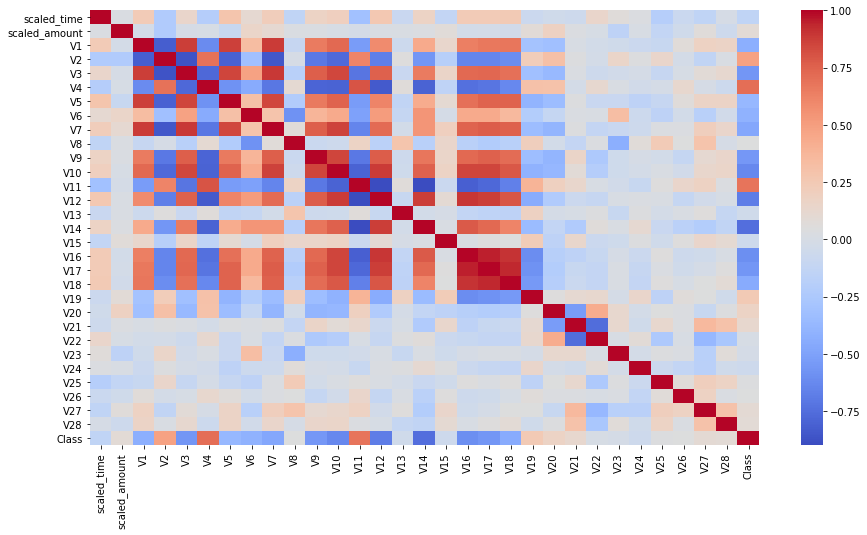

In [14]:
# corr mat for initial df

corr = new_df.corr()

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':20}, ax=ax)

We can observe correlations for the following features:
 - *Positive Correlations*: V2, V4, V11, V19
 - *Negative Correlations*: V3, V10, V12, V14

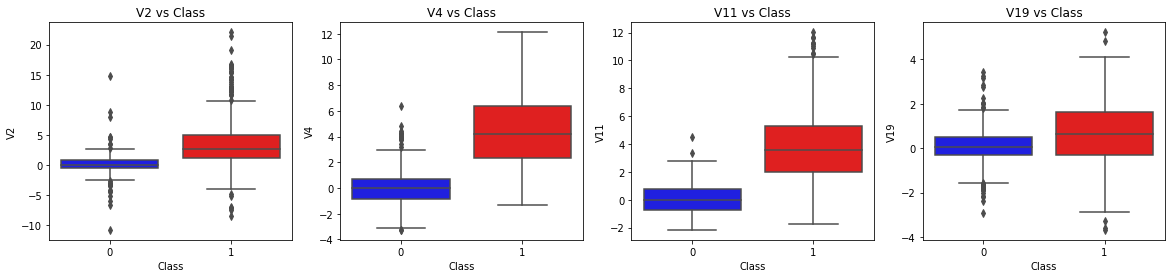

In [15]:
# Positive corr
f, axes = plt.subplots(ncols=4, figsize=(20,4))
features_to_plot_pos = ["V2", "V4", "V11", "V19"]

for index, feat in enumerate(features_to_plot_pos):
    sns.boxplot(x="Class", y=feat, data=new_df, palette=["blue", "red"], ax=axes[index])
    axes[index].set_title(f"{feat} vs Class")

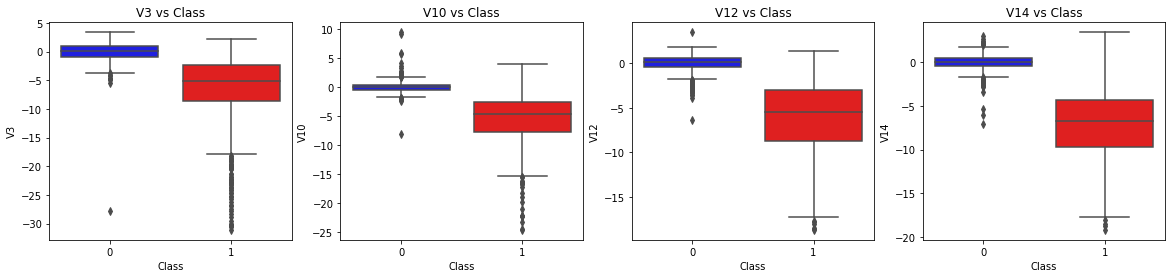

In [16]:
# Negative corr
f, axes = plt.subplots(ncols=4, figsize=(20, 4))
features_to_plot_neg = ["V3", "V10", "V12", "V14"]

for index, feat in enumerate(features_to_plot_neg):
    sns.boxplot(x="Class", y=feat, data=new_df, palette=["blue", "red"], ax=axes[index])
    axes[index].set_title(f"{feat} vs Class")

Let's take a look at the distribution of these features

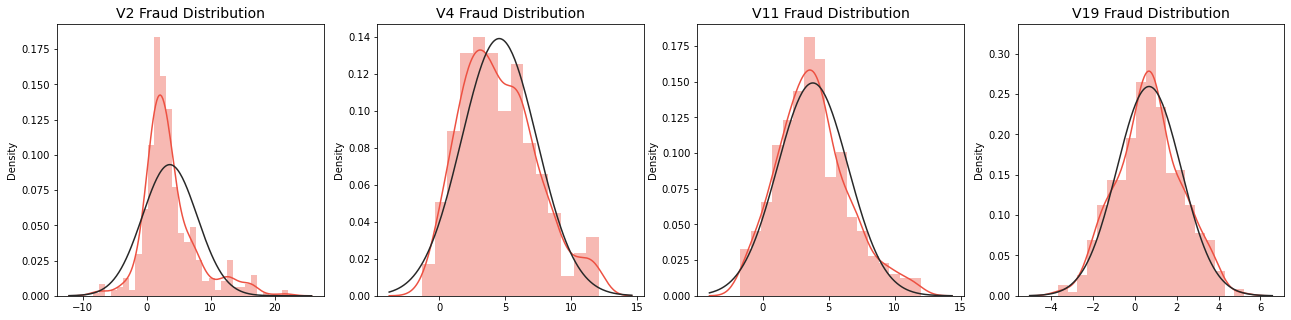

In [17]:
from scipy.stats import norm

f, axes = plt.subplots(ncols=4, figsize=(22, 5))

for index, feat in enumerate(features_to_plot_pos):
    dist = new_df[feat].loc[new_df['Class'] == 1].values
    sns.distplot(dist, ax=axes[index], fit=norm, color="#ed5142")
    axes[index].set_title(f"{feat} Fraud Distribution", fontsize=14)

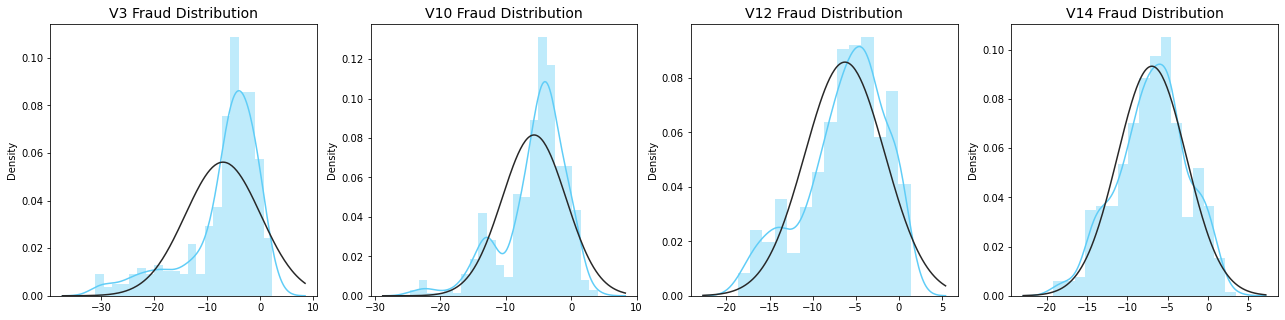

In [18]:
from scipy.stats import norm

f, axes = plt.subplots(ncols=4, figsize=(22, 5))

for index, feat in enumerate(features_to_plot_neg):
    dist = new_df[feat].loc[new_df['Class'] == 1].values
    sns.distplot(dist, ax=axes[index], fit=norm, color="#60cdf7")
    axes[index].set_title(f"{feat} Fraud Distribution", fontsize=14)

# Outliner detection

We eliminate values that are 1.5x times lower/higher than the inter quantile range

In [19]:
print("Size before trimming: ", new_df.shape[0])

for index, feat in enumerate(features_to_plot_neg + features_to_plot_pos):
    frauds = new_df[feat].loc[new_df["Class"] == 1].values
    q25, q75 = np.percentile(frauds, 25), np.percentile(frauds, 75)
    iqr = q75 - q25
    cut = iqr * 1.5
    low, up = q25 - cut, q75 + cut
    outliers = [x for x in frauds if x < low or x > up]
    # print(f"Outliers found for {feat}: ", len(outliers))
    new_df = new_df.drop(new_df[(new_df[feat]<low) | (new_df[feat]>up)].index)

print("Size after trimming: ", new_df.shape[0])

Size before trimming:  984
Size after trimming:  829


# Clustering

We are going to plot t-SNE and PCA in order to see how classification will perform

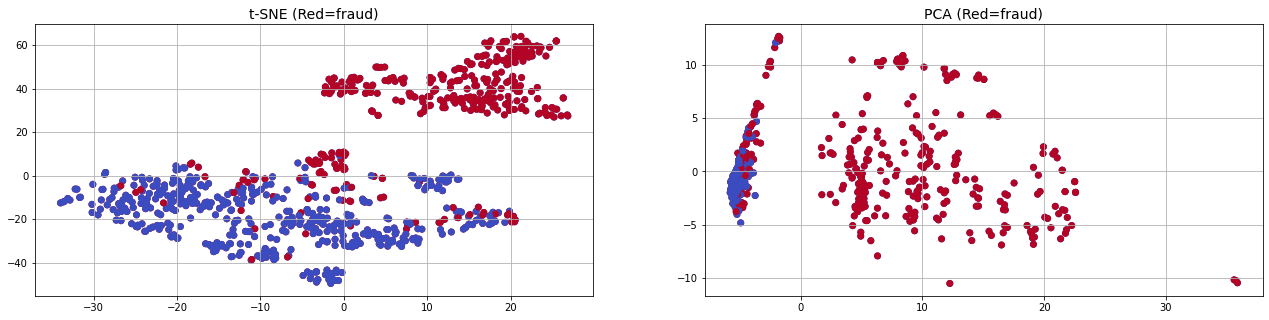

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = new_df.drop("Class", axis=1)
y = new_df["Class"]

X_tSNE = TSNE(random_state=1337).fit_transform(X.values)
X_PCA = PCA(random_state=1337).fit_transform(X.values)

f, axes = plt.subplots(ncols=2, figsize=(22, 5))

axes[0].scatter(X_tSNE[:, 0], X_tSNE[:, 1], c=(y == 0), cmap="coolwarm", label="Not fraud")
axes[0].scatter(X_tSNE[:, 0], X_tSNE[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud")
axes[0].set_title("t-SNE (Red=fraud)", fontsize=14)

axes[1].scatter(X_PCA[:, 0], X_PCA[:, 1], c=(y == 0), cmap="coolwarm", label="Not fraud")
axes[1].scatter(X_PCA[:, 0], X_PCA[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud")
axes[1].set_title("PCA (Red=fraud)", fontsize=14)

for ax in axes:
    ax.grid(True)

We can observe that both algorithm obtained clearly defined clusters

# Classification

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [22]:
from sklearn.model_selection import cross_val_score

# we perform cross validation not accuracy because we are dealing with imbalanced data
print("Cross validation scores:")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"\t{key}: ", round(score.mean()*100, 2), "%")

Cross validation scores:
	Logistic Regression:  92.27 %
	K Nearest Neighbors:  91.79 %
	Support Vector:  92.75 %
	Decision Tree:  88.89 %


In [23]:
# we perform grid search in order to find best params for these 4 models

from sklearn.model_selection import GridSearchCV

classifier_params = {
    "Logistic Regression": { "penalty": ["l1", "l2", "elasticnet"], "C": [0.01, 0.1, 1, 10, 100]},
    "K Nearest Neighbors": { "n_neighbors": list(range(2, 6)), "weights":["uniform", "distance"], "algorithm": ["ball_tree", "kd_tree", "brute"]},
    "Support Vector": { "kernel": ["rbf", "poly", "sigmoid"], "C": [0.1, 0.5, 0.8, 1, 5, 10]},
    "Decision Tree": { "criterion": ["gini","entropy"], "max_depth": list(range(4, 8))},
}

best_estimators = {}

print("Best parameters:")
for key, classifier in classifiers.items():
    cls_ = GridSearchCV(classifier, classifier_params[key])
    cls_.fit(X_train, y_train)
    best_estimators[key] = cls_.best_estimator_
    print(f"\t{key}: ", cls_.best_params_)

print("Cross validation scores after param optimizations:")
for key, estimator in best_estimators.items():
    score = cross_val_score(estimator, X_train, y_train, cv=5)
    print(f"\t{key}: ", round(score.mean() * 100, 2), "%")


Best parameters:
	Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}
	K Nearest Neighbors:  {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
	Support Vector:  {'C': 5, 'kernel': 'rbf'}
	Decision Tree:  {'criterion': 'gini', 'max_depth': 5}
Cross validation scores after param optimizations:
	Logistic Regression:  93.07 %
	K Nearest Neighbors:  91.95 %
	Support Vector:  92.91 %
	Decision Tree:  92.27 %


ROC AUC scores:


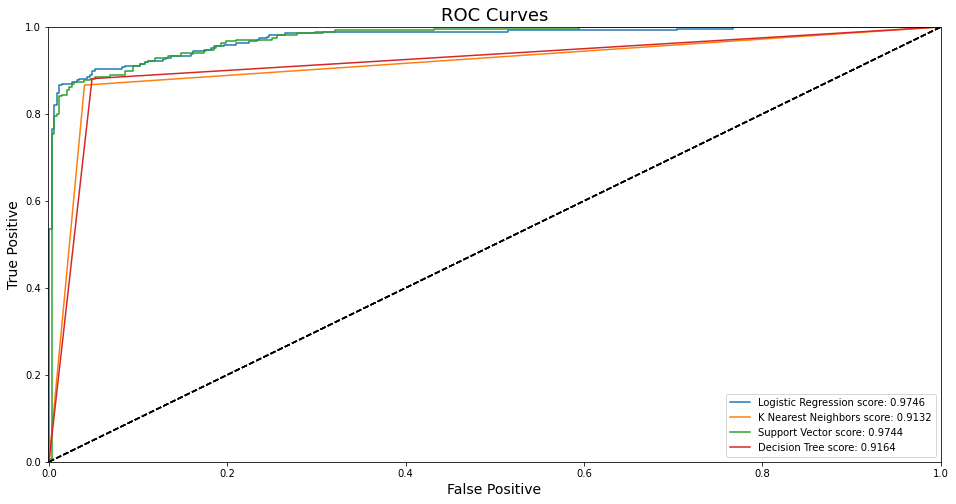

In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict


plt.figure(figsize=(16, 8))
plt.title("ROC Curves", fontsize=18)

print("ROC AUC scores:")
for key, estimator in best_estimators.items():
    method = "predict"
    if key == "Logistic Regression" or key == "Support Vector":
        method = "decision_function"
    prediction = cross_val_predict(estimator, X_train, y_train, cv=5, method=method)
    fpr, tpr, thresholds  = roc_curve(y_train, prediction)
    plt.plot(fpr, tpr, label=f"{key} score: {roc_auc_score(y_train, prediction):.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.001, 1, 0, 1])
    plt.xlabel("False Positive", fontsize=14)
    plt.ylabel("True Positive", fontsize=14)

plt.legend()